In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
from numba import jit
from numba.typed import List
a = sys.path.append('../modules/')
b = sys.path.append('../codes/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

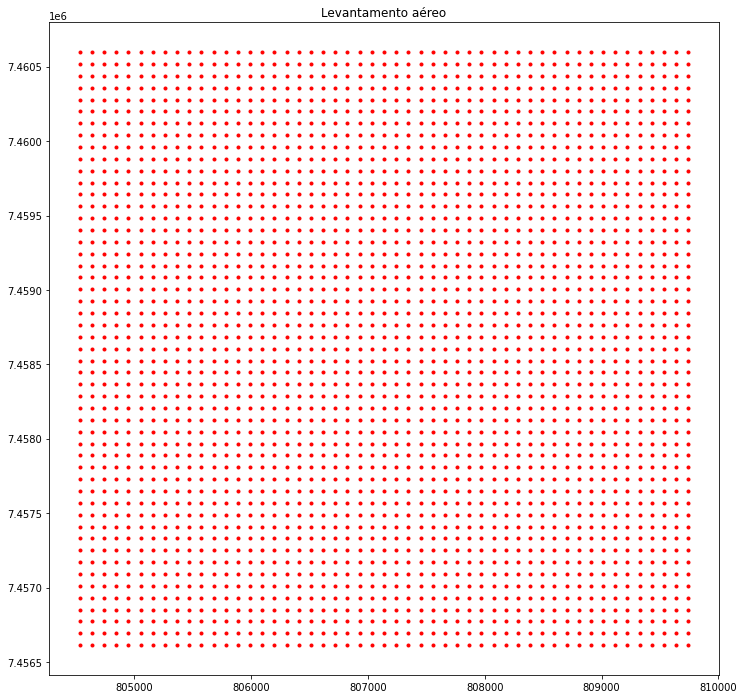

In [2]:
acquisition = {'nx': 51,
               'ny': 51,
               'xmax': 809743.0,
               'xmin': 804532.0,
               'ymax': 7460598.0,
               'ymin': 7456613.0,
               'z': -50.0,
               'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

In [3]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_mag_arraial.csv', sep=',')

In [4]:
data_cubo

,North(m),East(m),Anomalia Magnética(nT)
0,7.456719e+06,804532.851208,-94.599324
1,7.456797e+06,804534.421628,-101.014124
2,7.456874e+06,804535.992003,-107.582161
3,7.456952e+06,804537.562332,-116.132157
4,7.457029e+06,804539.132616,-124.230074
...,...,...,...
2596,7.460182e+06,809736.377030,-116.342309
2597,7.460260e+06,809737.971866,-118.146319
2598,7.460337e+06,809739.566656,-124.173387
2599,7.460415e+06,809741.161400,-130.266932


In [5]:
Y = np.array(data_cubo['East(m)'])
Y = np.reshape(Y, (51,51))
X = np.array(data_cubo['North(m)'])
X = np.reshape(X, (51,51))
Z = np.array(data_cubo['Anomalia Magnética(nT)'])
Z = np.reshape(Z, (51,51))

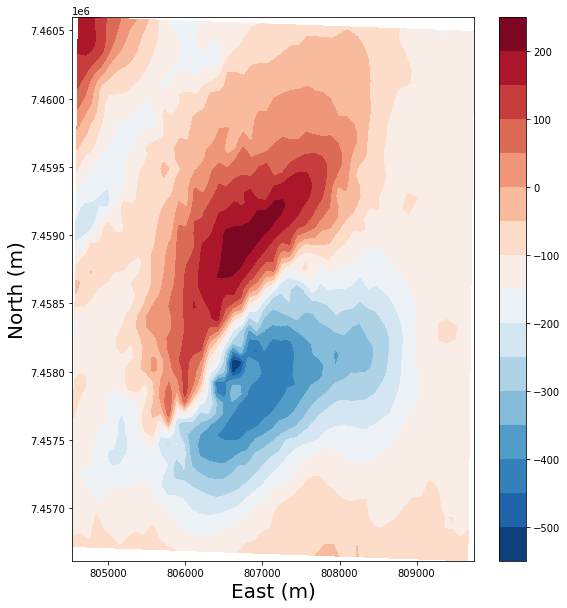

In [6]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y, X, Z, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [15]:
#data_cubo.loc(data_cubo['East(m)'] > 805000.0)
data_cubo.loc[(data_cubo['East(m)'] >= 804532.0) & (data_cubo['East(m)'] <= 805000.0), 'Anomalia Magnética(nT)'] = -110.0

In [16]:
data_cubo

,North(m),East(m),Anomalia Magnética(nT)
0,7.456719e+06,804532.851208,-110.000000
1,7.456797e+06,804534.421628,-110.000000
2,7.456874e+06,804535.992003,-110.000000
3,7.456952e+06,804537.562332,-110.000000
4,7.457029e+06,804539.132616,-110.000000
...,...,...,...
2596,7.460182e+06,809736.377030,-116.342309
2597,7.460260e+06,809737.971866,-118.146319
2598,7.460337e+06,809739.566656,-124.173387
2599,7.460415e+06,809741.161400,-130.266932


In [17]:
Y_1 = np.array(data_cubo['East(m)'])
Y_1 = np.reshape(Y_1, (51,51))
X_1 = np.array(data_cubo['North(m)'])
X_1 = np.reshape(X_1, (51,51))
Z_1 = np.array(data_cubo['Anomalia Magnética(nT)'])
Z_1 = np.reshape(Z_1, (51,51))

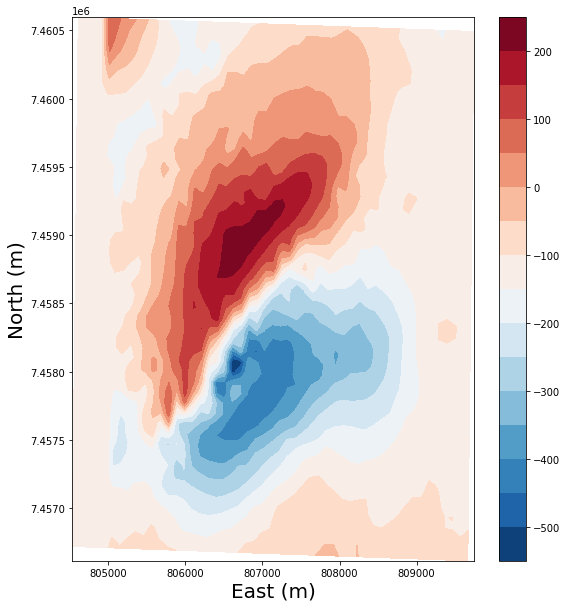

In [18]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y_1, X_1, Z_1, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [19]:
Data_f = data_cubo
#Data_f.to_csv('data_ajustment_mag_arraial.csv', index = False, header = True)

In [20]:
Data_f

,North(m),East(m),Anomalia Magnética(nT)
0,7.456719e+06,804532.851208,-110.000000
1,7.456797e+06,804534.421628,-110.000000
2,7.456874e+06,804535.992003,-110.000000
3,7.456952e+06,804537.562332,-110.000000
4,7.457029e+06,804539.132616,-110.000000
...,...,...,...
2596,7.460182e+06,809736.377030,-116.342309
2597,7.460260e+06,809737.971866,-118.146319
2598,7.460337e+06,809739.566656,-124.173387
2599,7.460415e+06,809741.161400,-130.266932
